## 데이터 준비하기

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import PIL.Image as pilimg
import tensorflow as tf
from skimage import data

In [40]:
img_path = './data/img/test.png'
image = pilimg.open(img_path)
hr = np.array(image)
hr.shape

(288, 512, 3)

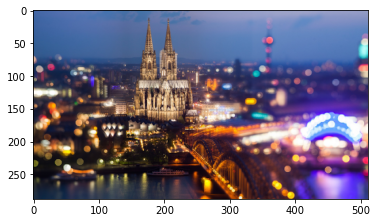

In [41]:
plt.imshow(hr)

In [42]:
lr = cv2.resize(
    hr, 
    dsize=(int(hr.shape[1]/4), int(hr.shape[0]/4)), # 고해상도 이미지 크기로 설정
    interpolation=cv2.INTER_LINEAR
)
lr.shape

(72, 128, 3)

In [43]:
bicubic_hr = cv2.resize(
    lr, 
    dsize=(hr.shape[1], hr.shape[0]), # 고해상도 이미지 크기로 설정
    interpolation=cv2.INTER_LINEAR
)
bicubic_hr.shape

(288, 512, 3)

## SRGAN 테스트하기

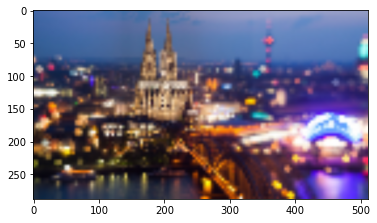

In [44]:
plt.imshow(bicubic_hr)

In [45]:
import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [46]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [47]:
srgan_hr = apply_srgan(lr)

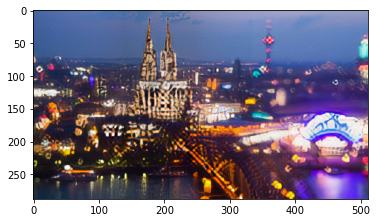

In [48]:
plt.imshow(srgan_hr)

In [49]:
def crop(image, left_top, x=50, y=100):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

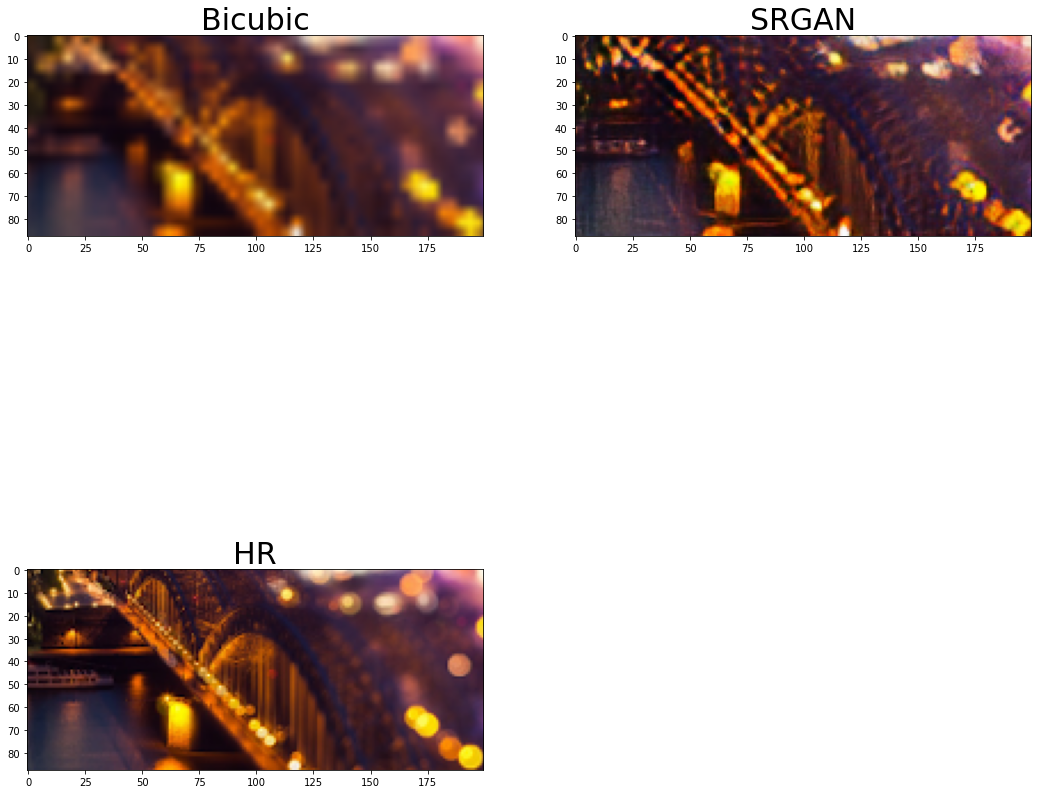

In [50]:
left_top = (200,200)

images = []
img1 = crop(bicubic_hr, left_top, 200, 200)
img2 = crop(srgan_hr , left_top, 200, 200)
img3 = crop(hr, left_top, 200, 200)
images.extend([img1, img2, img3])
labels = ["Bicubic", "SRGAN", "HR"]

plt.figure(figsize=(18,18))
for i in range(3):
    plt.subplot(2,2,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)